In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

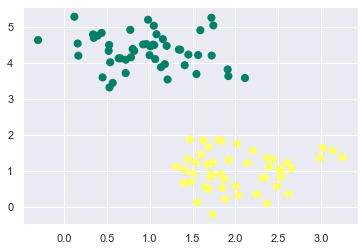

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.50)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

(-1.0, 3.5)

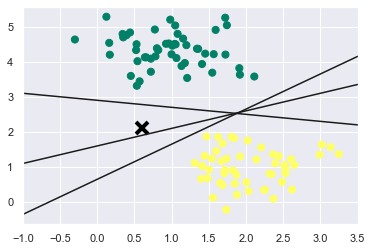

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
plt.plot([0.6], [2.1], 'x', color = 'black', markeredgewidth = 4, markersize = 12)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

(-1.0, 3.5)

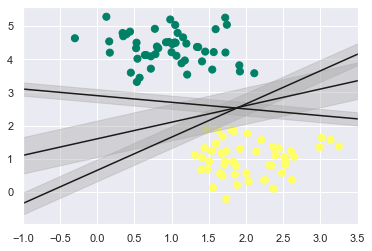

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
    
plt.xlim(-1, 3.5)

In [6]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

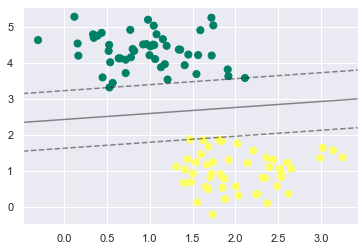

In [8]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)

In [9]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [10]:
#K En Yakın Komşu Algoritması (K Nearest Neighbour)
"""
1- Euclidean Distance (x1 - x2)^2 + (y1 - y2)^2 ==> L2 norm
2- Manhattan Distance |x1 - x2| + |y1 - y2| ==> L1 norm
3- Minkowski Distance (|x1 - x2|^p + |y1 - y2|^p)^(1/p) ==> Lp norm
4- Hamming Distance ==> Küçük ve Büyük -> 1, Küçük ve Küçük -> 0
"""

In [11]:
"""
1- K değeri seçeceğiz. Tek bir sayı seçilir.
2- Eğitim verisi içerisindeki her bir noktanın, yeni noktaya olan mesafesi ölçülür
3- K adet en yakın komşu bulunur (yeni veri noktasına olan)
4- Her bir sınıftaki veri noktaları sayılarak, daha fazla komşuya sahip olunan kategori yeni sınıf 
olarak belirlenir.
"""

'\n1- K değeri seçeceğiz. Tek bir sayı seçilir.\n2- Eğitim verisi içerisindeki her bir noktanın, yeni noktaya olan mesafesi ölçülür\n3- K adet en yakın komşu bulunur (yeni veri noktasına olan)\n4- Her bir sınıftaki veri noktaları sayılarak, daha fazla komşuya sahip olunan kategori yeni sınıf \nolarak belirlenir.\n'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv('data/data_cleaned.csv')
data.shape

(891, 25)

In [14]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56, stratify = y)

In [55]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [56]:
classifier = KNN(n_neighbors = 10, metric = 'euclidean') #k = 10

classifier.fit(train_x, train_y)

test_predict = classifier.predict(test_x)

k_1 = f1_score(test_predict, test_y)

In [57]:
def Elbow(K):
    
    test_error = []
    
    for i in K:
        classifier = KNN(n_neighbors = i)
        classifier.fit(train_x, train_y)
        
        tmp = classifier.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
        
    return test_error

In [63]:
k = range(6, 50, 2)

In [64]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

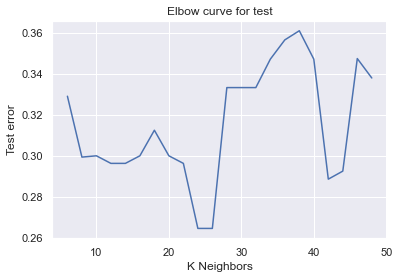

In [65]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [66]:
classifier = KNN(n_neighbors = 27, metric = 'euclidean')

classifier.fit(train_x, train_y)

test_predict = classifier.predict(test_x)

k_2 = f1_score(test_predict, test_y)

In [62]:
print("Before Elbow Method Knn Score: ", k_1)
print("After Elbow Method to put right K-Value Knn Score: ", k_2)

Before Elbow Method Knn Score:  0.7000000000000001
After Elbow Method to put right K-Value Knn Score:  0.751592356687898
